In [5]:
import pandas as pd

# Read the file with the specified encoding
df = pd.read_csv("/home/jovyan/ML_assignment4/SeoulBikeData 2.csv", encoding="ISO-8859-1")


In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

[Text(0.5, 0, 'Humidity(%)'),
 Text(0, 0.5, 'Rented Bike Count'),
 Text(0.5, 1.0, 'Humidity(%)')]

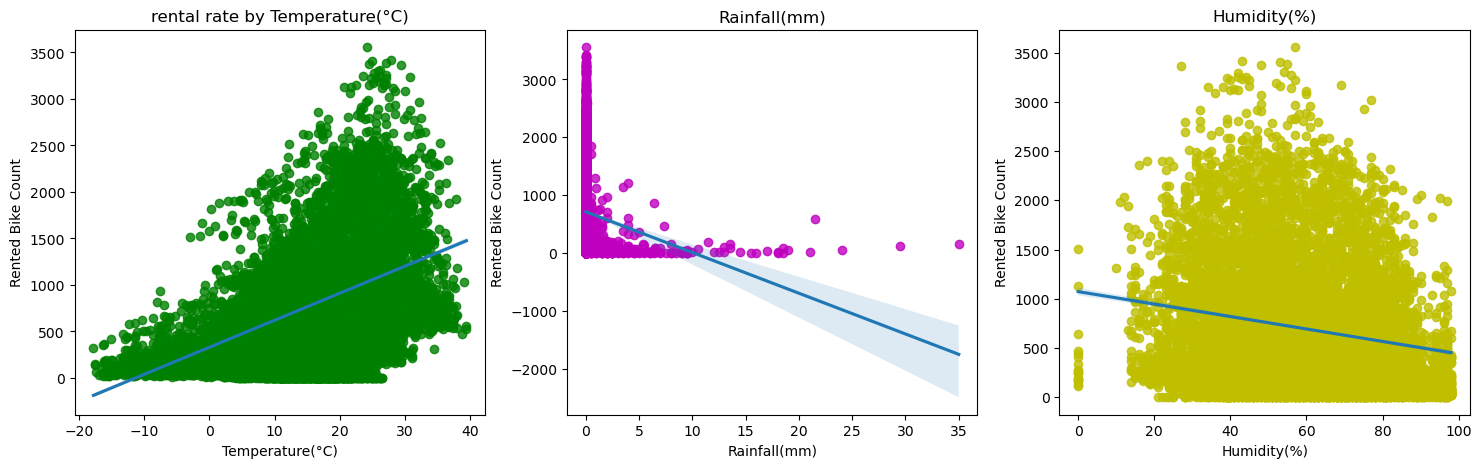

In [8]:
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,5)
sns.regplot(data=df, x='Temperature(°C)', y='Rented Bike Count', scatter_kws={'color': 'g'}, ax=ax1)
sns.regplot(data=df, x='Rainfall(mm)', y='Rented Bike Count', scatter_kws={'color':'m'}, ax=ax2)
sns.regplot(data=df, x='Humidity(%)', y='Rented Bike Count',scatter_kws={'color':'y'},ax=ax3)

ax1.set(xlabel='Temperature(°C)',ylabel='Rented Bike Count', title='rental rate by Temperature(°C)')
ax2.set(xlabel='Rainfall(mm)',ylabel='Rented Bike Count', title='Rainfall(mm)')
ax3.set(xlabel='Humidity(%)',ylabel='Rented Bike Count', title='Humidity(%)')

In [9]:
print(df.columns)
df

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [14]:
df.rename(columns={'Rented Bike Count': 'Rented_Bike_Count'}, inplace=True)

X = df.drop(['Date', 'Rented_Bike_Count','Seasons','Holiday','Functioning Day'], axis=1)
y = df.Rented_Bike_Count

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
y_hat = model.predict(X)


 NMAE: inf


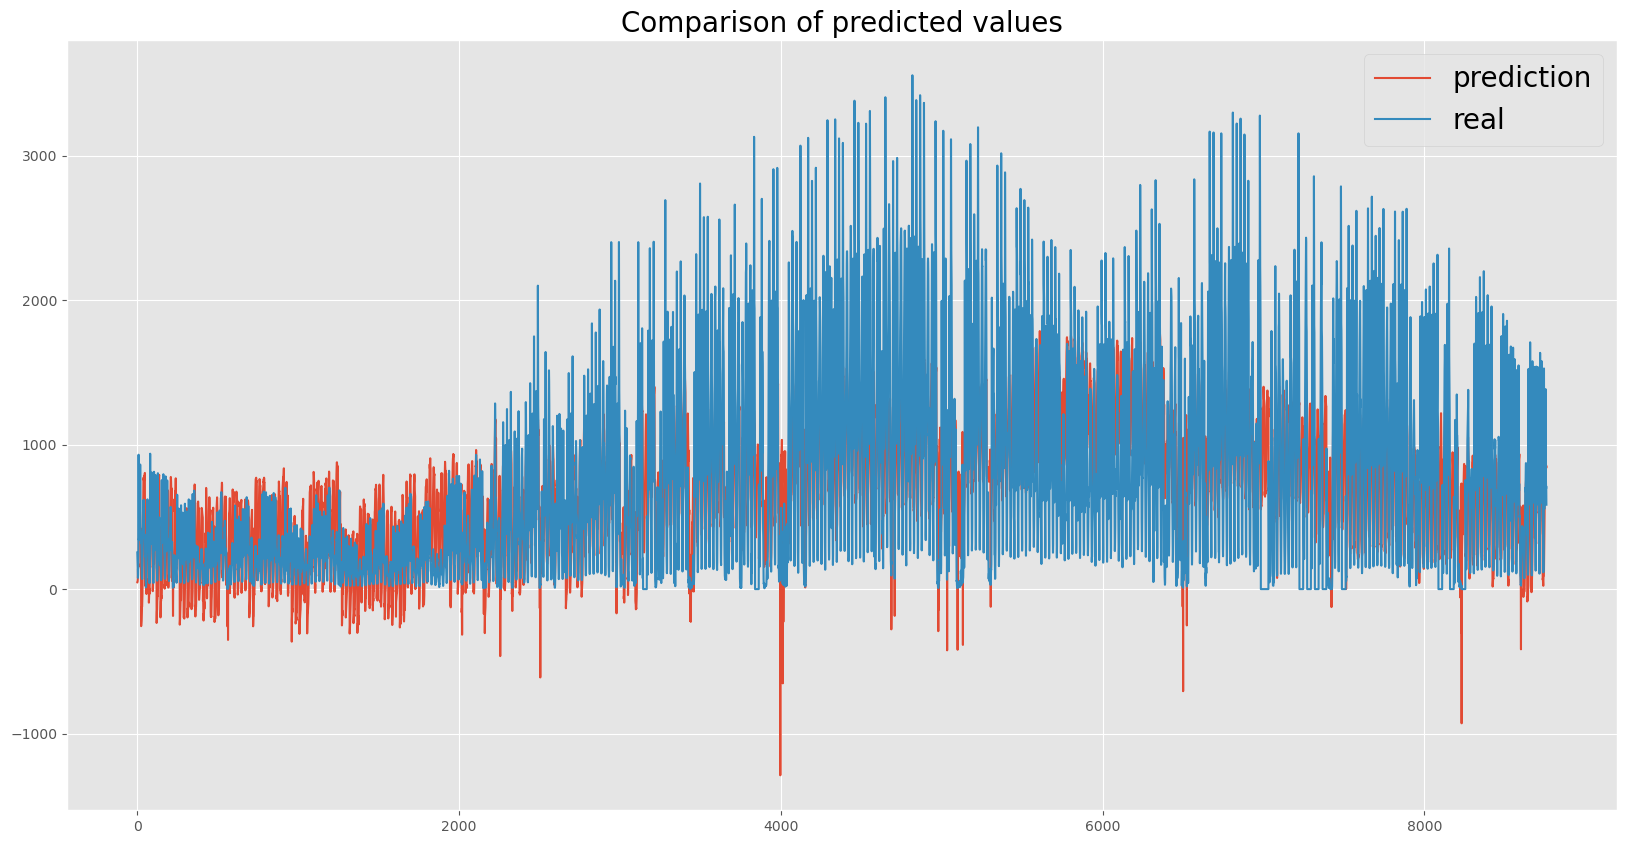

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y, label = 'real')
plt.legend(fontsize = 20)
plt.title("Comparison of predicted values", fontsize = 20)
plt.show()